In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE  # for oversampling
from collections import Counter

In [2]:
# 2️⃣ Load the dataset
df = pd.read_csv("Lung Cancer.csv")  # replace with your file path
print("Columns:", df.columns)
print("First 5 rows:\n", df.head())

Columns: Index(['id', 'age', 'gender', 'country', 'diagnosis_date', 'cancer_stage',
       'family_history', 'smoking_status', 'bmi', 'cholesterol_level',
       'hypertension', 'asthma', 'cirrhosis', 'other_cancer', 'treatment_type',
       'end_treatment_date', 'survived'],
      dtype='object')
First 5 rows:
    id   age  gender      country diagnosis_date cancer_stage family_history  \
0   1  64.0    Male       Sweden     2016-04-05      Stage I            Yes   
1   2  50.0  Female  Netherlands     2023-04-20    Stage III            Yes   
2   3  65.0  Female      Hungary     2023-04-05    Stage III            Yes   
3   4  51.0  Female      Belgium     2016-02-05      Stage I             No   
4   5  37.0    Male   Luxembourg     2023-11-29      Stage I             No   

   smoking_status   bmi  cholesterol_level  hypertension  asthma  cirrhosis  \
0  Passive Smoker  29.4                199             0       0          1   
1  Passive Smoker  41.2                280           

In [4]:
# 3️⃣ Explore target distribution
target_col = "survived"  # replace with your actual target column name
print("\nTarget value counts:\n", df[target_col].value_counts())


Target value counts:
 survived
0    693996
1    196004
Name: count, dtype: int64


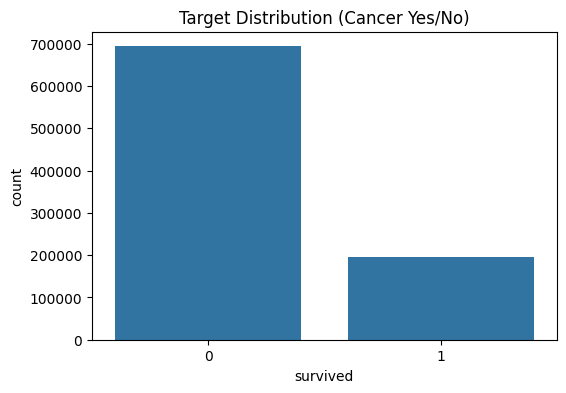

In [5]:
# 4️⃣ Plot target distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x=target_col)
plt.title("Target Distribution (Cancer Yes/No)")
plt.show()

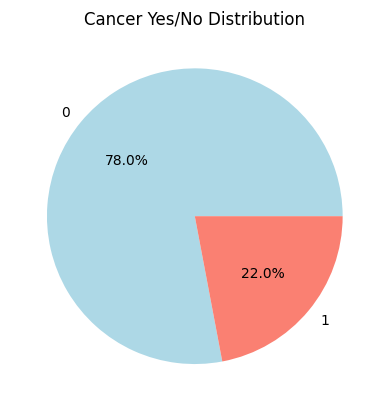

In [6]:
# Optional: Pie chart
df[target_col].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
plt.title("Cancer Yes/No Distribution")
plt.ylabel("")
plt.show()

In [14]:
from collections import Counter
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE

# 1️⃣ Split features and target
X = df.drop(target_col, axis=1)
y = df[target_col]

# 2️⃣ Encode categorical columns (convert strings → numbers)
X_encoded = X.copy()
for col in X_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])

# 3️⃣ Check original distribution
print("Original class distribution:", Counter(y))

# 4️⃣ Apply SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_encoded, y)

print("After SMOTE class distribution:", Counter(y_res))

# 5️⃣ Convert back to DataFrame if needed
df_resampled = pd.DataFrame(X_res, columns=X_encoded.columns)
df_resampled[target_col] = y_res


Original class distribution: Counter({0: 693996, 1: 196004})
After SMOTE class distribution: Counter({0: 693996, 1: 693996})


In [17]:
# 6️⃣ Optional: save cleaned & balanced data
df_resampled.to_csv("lung_cancer_balanced.csv", index=False)
print("Balanced dataset saved as lung_cancer_balanced.csv")

Balanced dataset saved as lung_cancer_balanced.csv
